In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78626950/optimizing-system-of-two-non-linear-equations

![Formula](https://i.sstatic.net/WiaOY0Qw.png)

In [4]:
C_p = 10
P_0 = 110
C_op = 2.7
gamma = 0.03
delta = 0.1
C_h = 0.25
C_d = 17
theta = 0.1
a = 100
p = 15
b = 0.5
c = 0.25
C_s = 50

In [5]:
l = theta + gamma - c * (delta - 1)
mu = P_0 + a * pow(p,-b) * (delta - 1)
K_1 = (a * pow(p,-b) * delta) + ((mu/l) * ((c * delta) - gamma))
K_2 = (mu/(l*l)) * (gamma - c * delta)

In [6]:
def aux_1(x):
    return (C_h + C_d * theta) * (((mu/l) * (1 - np.exp(-l * x[0]))) - ((a*pow(p,-b)/(theta + c)) * (np.exp((theta + c)*(x[1]-x[0])) - 1)))

def aux_2(x):
    return ((a*np.power(p,-b)/(theta + c)) * ((x[1] - 1/(theta + c))*(np.exp((theta + c) * (x[1] - x[0]))-1) + (x[1] - x[0]))) - ((mu/l) * (x[0] + ((np.exp(-l*x[0])-1)/l)))

In [7]:
def func(x):
    return [C_p * P_0 + C_op * (x[0] + l * K_2 * np.exp(-l * x[0])) + aux_1(x),
          ((C_h + C_d * theta) * aux_2(x)) - C_s - (C_p * P_0 * x[0]) - (C_op * ((K_1 * x[0]) - (K_2 * (np.exp(-l*x[0])-1))))]

In [31]:
xlin = np.linspace(0, 200, 300)
ylin = np.linspace(0, 200, 300)
X, Y = np.meshgrid(xlin, ylin)
U, V = func([X, Y])

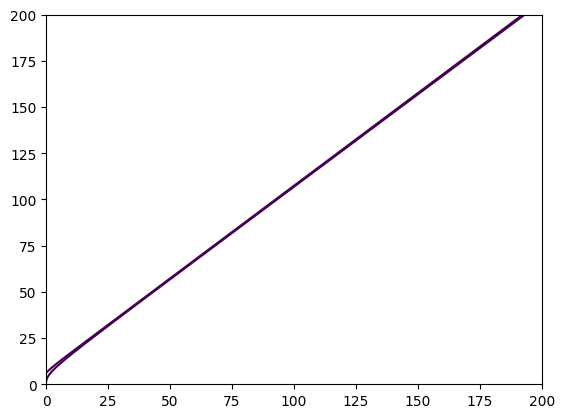

In [32]:
fig, axe = plt.subplots()
axe.contour(X, Y, U, [0])
axe.contour(X, Y, V, [0])

In [33]:
optimize.fsolve(func, x0=[100., 100.])

/tmp/ipykernel_5325/4085204316.py:1: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  optimize.fsolve(func, x0=[100., 100.])


array([ 99.99927472, 100.00144465])